<a href="https://colab.research.google.com/github/abdulxs/Pattern-Recognition/blob/main/PR_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1**

In [ ]:
import time
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from itertools import product
from sklearn.metrics import pairwise_distances_argmin_min

In [ ]:
origin_data = np.loadtxt('jain.txt')
points = origin_data[:, :2]
origin_labels = origin_data[:, 2]

In [ ]:
CLUSTERS = 2
MAX_ITERS = 2

def run_kmeans(points, num_clusters):
  centroids = points[np.random.randint(0, len(points), size=(num_clusters,))]
  for iteration in range(MAX_ITERS):
    distances = np.stack([np.sum((points-c)**2, axis=1) for c in centroids]).T
    clustering = np.argmin(distances, axis=1)
    for c_idx in range(num_clusters):
      centroids[c_idx] = points[clustering == c_idx].mean(axis=0)
  return centroids


def run_mountain_clustering(points, num_clusters, num_cells=20, sigma=1, beta=1):
  min_x,max_x = points[:, 0].min(), points[:, 0].max()
  min_y,max_y = points[:, 1].min(), points[:, 1].max()
  grid_points = np.array(list(product(np.linspace(min_x, max_x, num_cells),
                                  np.linspace(min_y, max_y, num_cells))))
  densities = np.zeros((len(grid_points),))
  for idx in range(len(grid_points)):
    sqr_distances = np.sum((points - grid_points[idx])**2, axis=1)
    densities[idx] = np.sum(np.exp(-(sqr_distances/(2*sigma**2))))
  centroids = np.zeros((num_clusters, 2))
  for i in range(num_clusters):
    centroid_idx = np.argmax(densities)
    centroids[i] = grid_points[centroid_idx]
    densities -= densities[centroid_idx] * np.exp(
    -np.sum((grid_points - grid_points[centroid_idx])**2) / (2*beta**2))


    densities = np.clip(densities, 0, None)
  return centroids

def run_subtractive_clustering(points, num_clusters, num_cells=20, sigma=1, beta=1):
  min_x, max_x = points[:, 0].min(), points[:, 0].max()
  min_y, max_y = points[:, 1].min(), points[:, 1].max()
  grid_points = np.array(list(product(np.linspace(min_x, max_x, num_cells),
                                         np.linspace(min_y, max_y, num_cells))))
  densities = np.zeros((len(grid_points),))
  for idx in range(len(grid_points)):
    sqr_distances = np.sum((points - grid_points[idx])**2, axis=1)
    densities[idx] = np.sum(np.exp(-(sqr_distances / (2 * sigma**2))))
  centroids = np.zeros((num_clusters, 2))
  for i in range(num_clusters):
    centroid_idx = np.argmax(densities)
    centroids[i] = grid_points[centroid_idx]
    densities -= densities[centroid_idx] * np.exp(
    -np.sum((grid_points - grid_points[centroid_idx])**2) / (2 * beta**2))
    densities = np.clip(densities, 0, None)
  return centroids

In [ ]:
kmeans_clusters = run_kmeans(points, CLUSTERS)
mountain_clusters = run_mountain_clustering(points, CLUSTERS, sigma=10, beta=10)
subtractive_clusters = run_subtractive_clustering(points, CLUSTERS, sigma=10, beta=10)

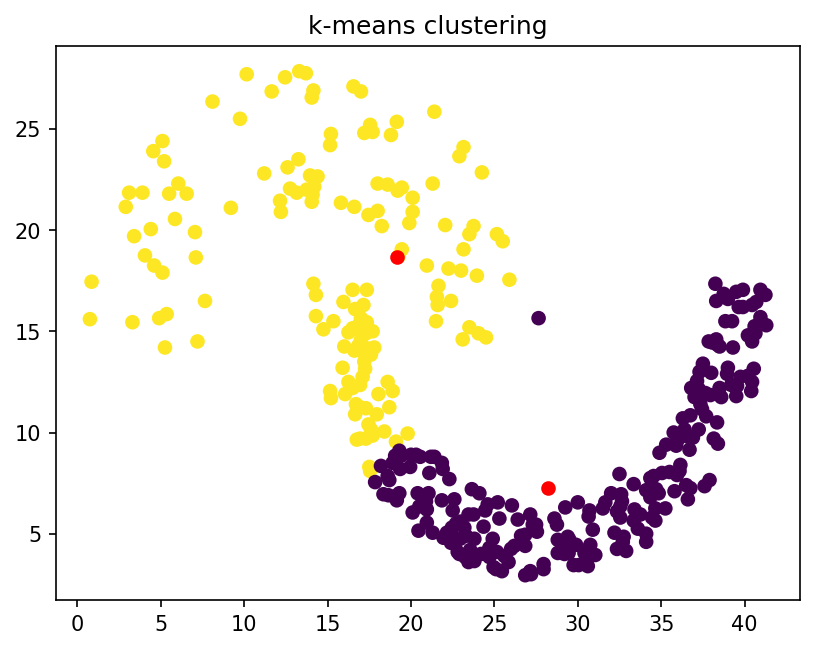

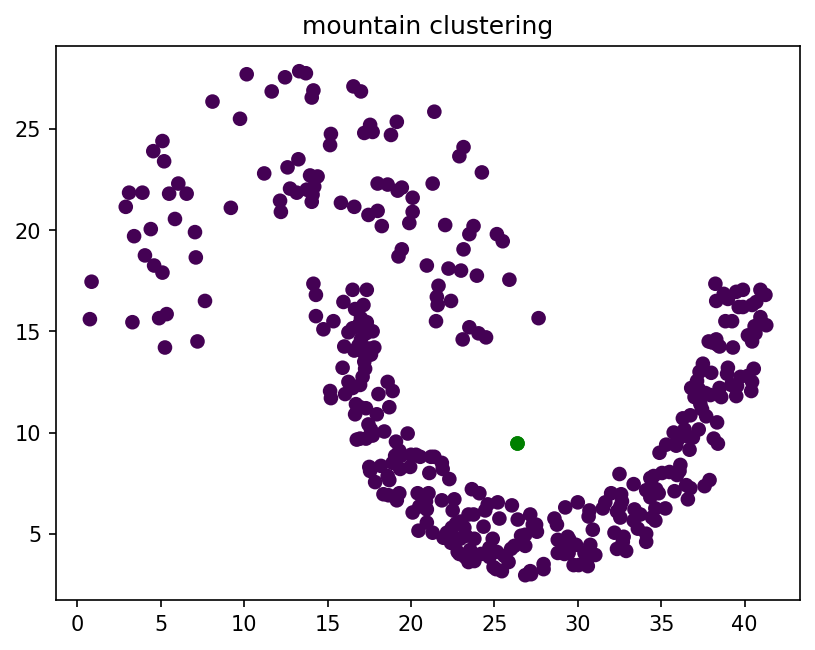

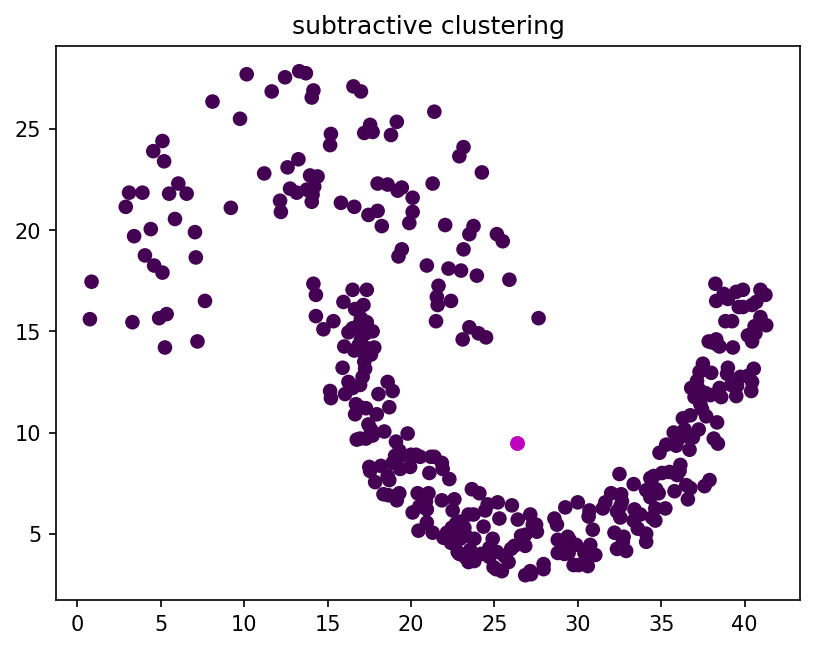

In [ ]:
_ = plt.figure(dpi=150)
clustering = np.argmin(np.stack([np.sum((points-c)**2, axis=1) for c in kmeans_clusters]).T, axis=1)
plt.scatter(points[:, 0], points[:, 1], c = clustering)
plt.scatter(kmeans_clusters[:,  0], kmeans_clusters[:, 1], c = 'r')
plt.title('k-means clustering')

_ = plt.figure(dpi=150)
clustering = np.argmin(np.stack([np.sum((points-c)**2,axis=1) for c in mountain_clusters]).T, axis=1)
plt.scatter(points[:, 0], points[:, 1], c = clustering)
plt.scatter(mountain_clusters[:,  0], mountain_clusters[:, 1], c = 'g')
plt.title('mountain clustering')

_ = plt.figure(dpi=150)
clustering = np.argmin(np.stack([np.sum((points-c)**2,axis=1) for c in subtractive_clusters]).T, axis=1)
plt.scatter(points[:, 0], points[:, 1], c = clustering)
plt.scatter(subtractive_clusters[:,  0], subtractive_clusters[:, 1], c = 'm')
plt.title('subtractive clustering')

plt.show()

K-means - Accuracy: 0.53, Loss: 22209.25, Runtime: 0.0306 seconds
Mountain - Accuracy: 0.00, Loss: 56490.90, Runtime: 0.0247 seconds
Subtractive - Accuracy: 0.00, Loss: 56490.90, Runtime: 0.0235 seconds


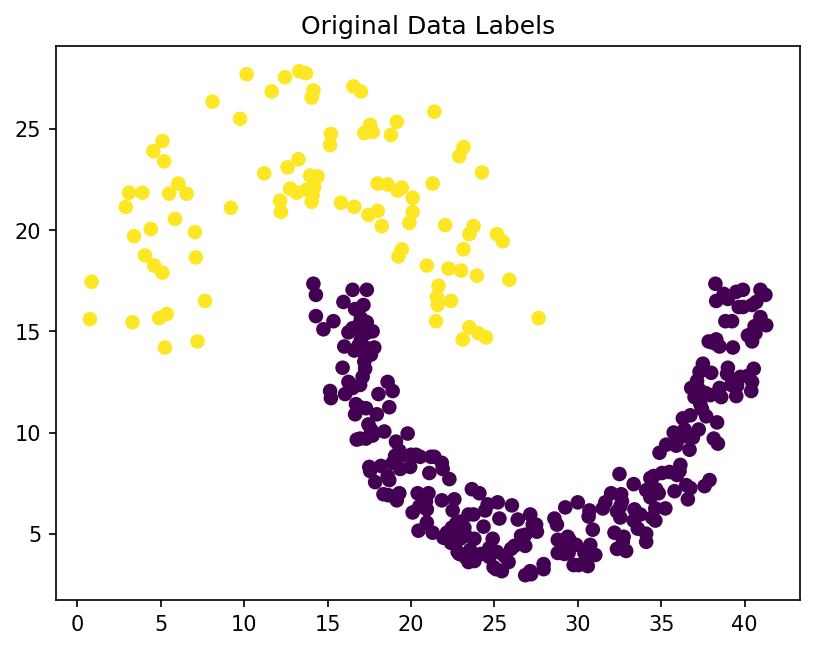

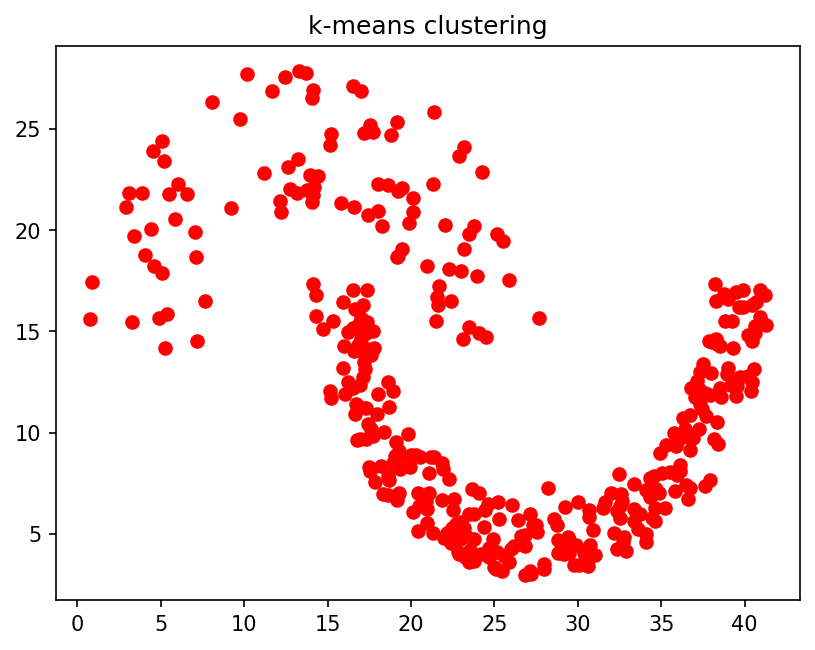

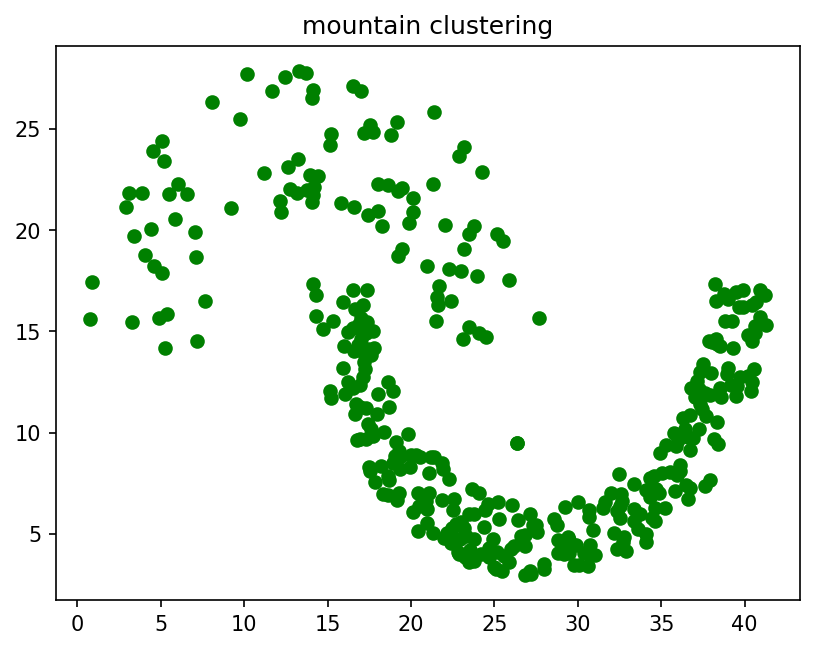

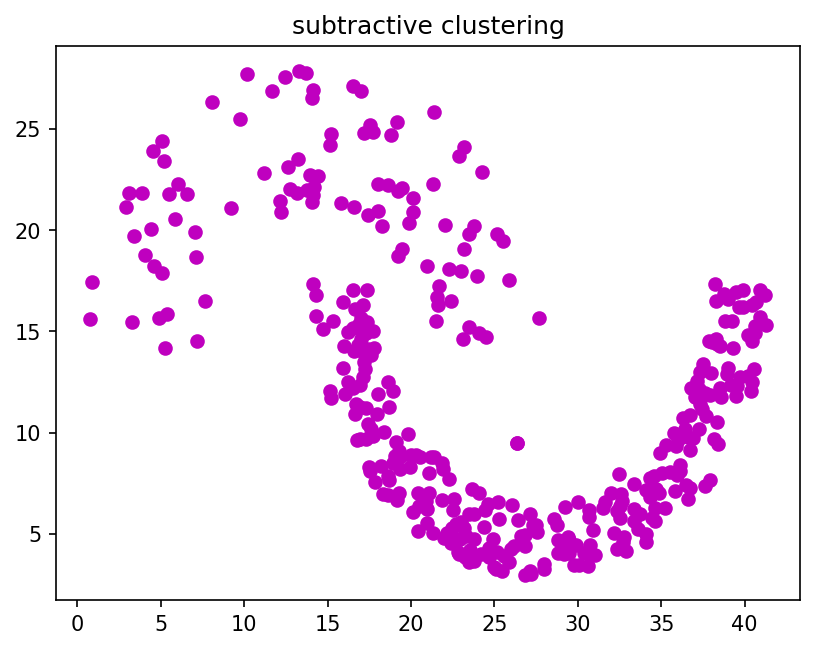

**Question 2**

In [ ]:
data = np.loadtxt('butterfly.txt')
points = data


In [ ]:
def fuzzy_c_means_clustering(points, number_clusters, m=2, max_iters=100):
    centroids = np.random.uniform(low=(points[:, 0].min(), points[:, 1].min()),
                                   high=(points[:, 0].max(), points[:, 1].max()),
                                   size=(number_clusters, 2))
    weights = np.random.random((len(points), number_clusters))
    for iteration in range(max_iters):
        distances = np.stack([np.sqrt(np.sum((points - c) ** 2, axis=1)) for c in centroids]).T
        for c in range(number_clusters):
            weights[:, c] = 1 / (
                np.sum((distances[:, c, None] / (distances + 1e-5)) ** (2 / (m - 1)), axis=1)
            )
        for c in range(number_clusters):
            centroids[c] = np.sum(points * (weights[:, c, None] ** m), axis=0) / np.sum(weights[:, c] ** m, axis=0)
        distances = np.stack([np.sqrt(np.sum((points - c) ** 2, axis=1)) for c in centroids]).T
        for c in range(number_clusters):
            weights[:, c] = 1 / (
                np.sum((distances[:, c, None] / (distances + 1e-5)) ** (2 / (m - 1)), axis=1)
            )
    return centroids, weights


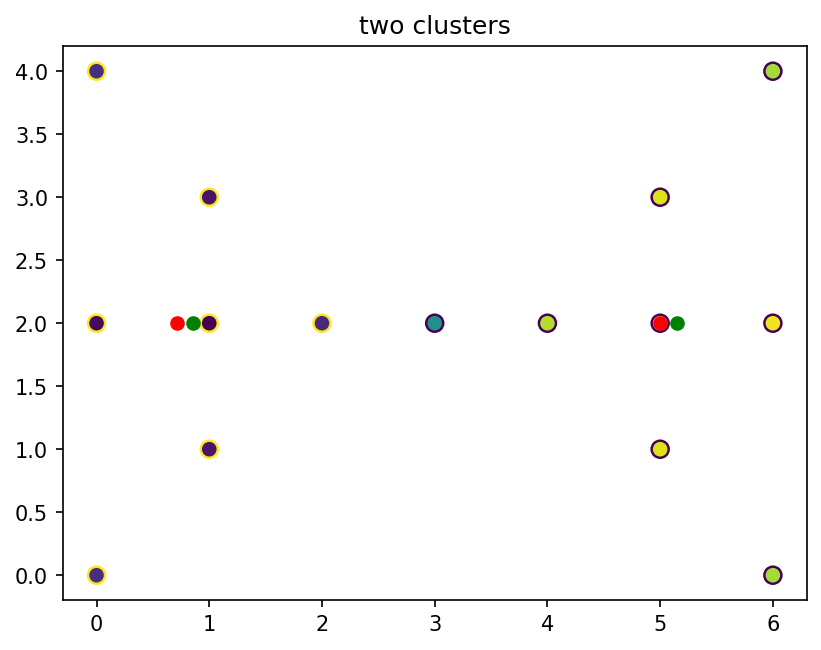

In [ ]:
kmeans_clusters = run_kmeans(points, 2)
fuzzy_clusters, fuzzy_weights = fuzzy_c_means_clustering(points, 2, 2)

_ = plt.figure(dpi = 150)
kmeans_clustering = np.argmin(np.stack([np.sum((points-c)**2, axis=1) for c in kmeans_clusters]).T, axis=1)

plt.scatter(points[:, 0], points[:,1], c=kmeans_clustering, s=70)
plt.scatter(points[:, 0], points[:,1], c=fuzzy_weights[:,0])

plt.scatter(kmeans_clusters[:,0], kmeans_clusters[:,1], c="r")
plt.scatter(fuzzy_clusters[:,0], fuzzy_clusters[:,1], c="g")
plt.title("two clusters")
plt.show()

With points (3,2)

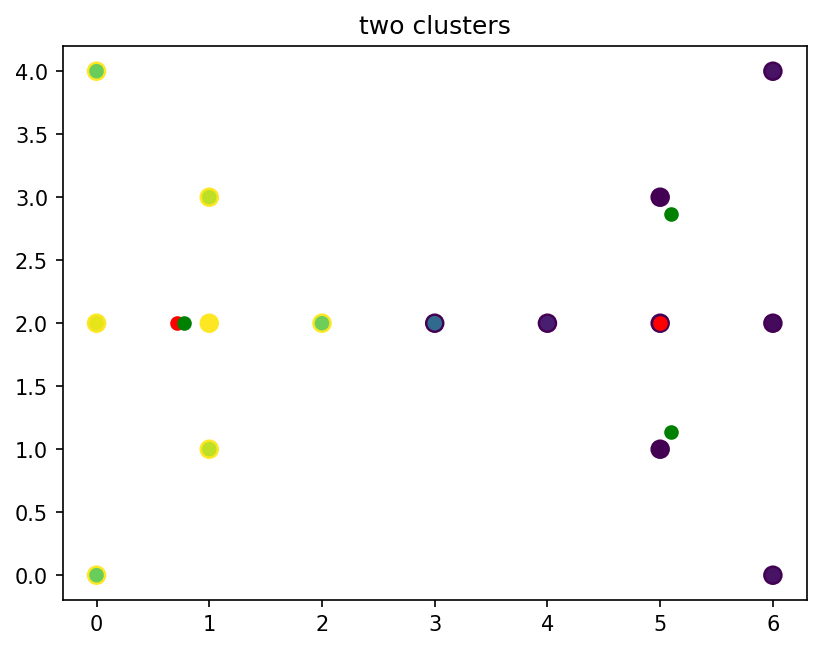

In [ ]:
kmeans_clusters = run_kmeans(points, 2)
fuzzy_clusters, fuzzy_weights = fuzzy_c_means_clustering(points, 3, 2)

_ = plt.figure(dpi = 150)
kmeans_clustering = np.argmin(np.stack([np.sum((points-c)**2, axis=1) for c in kmeans_clusters]).T, axis=1)

plt.scatter(points[:, 0], points[:,1], c=kmeans_clustering, s=70)
plt.scatter(points[:, 0], points[:,1], c=fuzzy_weights[:,0])

plt.scatter(kmeans_clusters[:,0], kmeans_clusters[:,1], c="r")
plt.scatter(fuzzy_clusters[:,0], fuzzy_clusters[:,1], c="g")
plt.title("two clusters")
plt.show()


We can see from the above that the clustering results change between trials.







When the number of clusters is set to 3.

In [ ]:
kmeans_clusters = run_kmeans(points, 3)
fuzzy_clusters, fuzzy_weights = fuzzy_c_means_clustering(points, 3, 2)

Text(0.5, 1.0, 'three clusters')

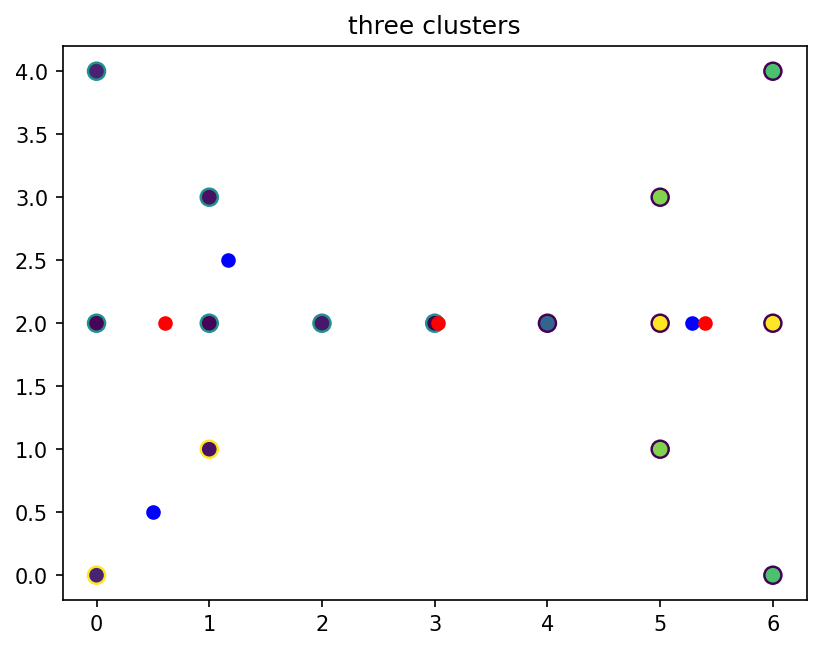

In [ ]:
_ = plt.figure(dpi = 150)
kmeans_clustering = np.argmin(np.stack([np.sum((points-c)**2, axis=1) for c in kmeans_clusters]).T, axis=1)

plt.scatter(points[:, 0], points[:,1], c=kmeans_clustering, s=70)
plt.scatter(points[:, 0], points[:,1], c=fuzzy_weights[:,0])

plt.scatter(kmeans_clusters[:,0], kmeans_clusters[:,1], c="blue")
plt.scatter(fuzzy_clusters[:,0], fuzzy_clusters[:,1], c="red")
plt.title("three clusters")